# Projeto Ciência de Dados - Previsão de Vendas

- Desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: advertising.csv - novos.csv

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
# Passo 1: Entendimento do Desafio
# Passo 2: Entendimento da Área/Empresa

# Passo 3: Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)


# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info()) #-> Tabela está com os dados corretos

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
#! pip install matplotlib
#! pip install seaborn
#! pip install scikit-learn

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


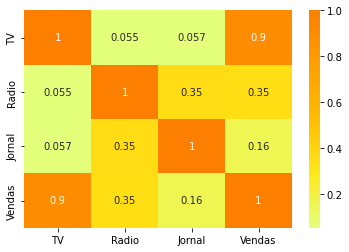

In [7]:
# Passo 5: Análise Exploratória
display(tabela.corr())

import matplotlib.pyplot as plt # https://matplotlib.org/
import seaborn as sns # https://seaborn.pydata.org/

# cria o grafico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True) 
# Coloração do grafico -> https://seaborn.pydata.org/generated/seaborn.heatmap.html
# exibe o grafico
plt.show()

#### Preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [12]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)

# y = a quem você quer prever
y = tabela["Vendas"]


# x = quem eu vou usar para prever o y, que neste caso é o resto da tabela
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [13]:
# Como cria Inteligencia Artificial (https://scikit-learn.org/stable/)

# Importar
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [14]:
# Passo 7: Interpretação de Resultados
from sklearn.metrics import r2_score

# Fazer as previsões
previsao_arvoredesicao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# Comparar a previsão com o y_teste
print(r2_score(y_teste, previsao_arvoredesicao))
print(r2_score(y_teste, previsao_regressaolinear))


0.9644842818838752
0.9071151423684273


#### Visualização Gráfica das Previsões

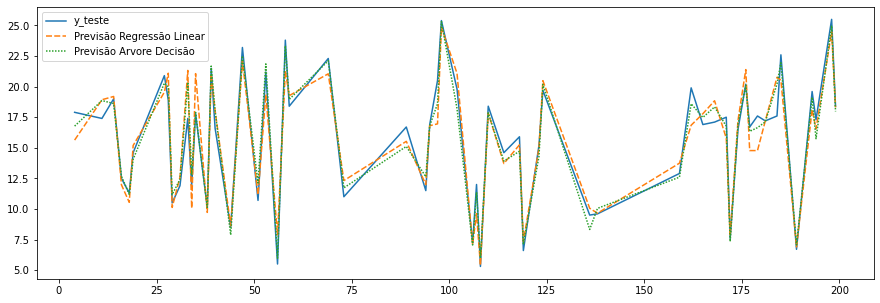

In [18]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsão Arvore Decisão"] = previsao_arvoredesicao

plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar)
plt.show()


#### Como fazer uma nova previsão?

In [19]:
tabela_nova = pd.read_csv("novos.csv")
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [32]:
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

[ 7.312  8.549 20.094]
